In [3]:
from torchvision.datasets import CocoDetection, wrap_dataset_for_transforms_v2
from coco_inpaint_dataset import CoCoInpaintDataset
import os.path as osp
from torchvision.transforms import ToTensor, Compose, Resize
import torch as th
from helpers import plot

dataset = CocoDetection(root="/workspace/coco2017_tr_val/val2017/", 
                        annFile="/workspace/coco2017_tr_val/annotations/instances_val2017.json", 
                        transform=Compose([
                            ToTensor(),
                            # Resize((712, 712))
                        ]))
dataset = CoCoInpaintDataset(dataset)
# loader = th.utils.data.DataLoader(dataset, batch_size=4)
    

loading annotations into memory...
Done (t=0.55s)
creating index...
index created!


In [2]:
from torchvision.datasets import CocoDetection
from torchvision.transforms import ToTensor, Compose, Resize


class CustomCoco(CocoDetection):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self._ids = list(sorted(self.ids, key=lambda id: len(self.coco.getAnnIds(id))))
        self.ids = []
        for i in self._ids:
            if len(self.coco.getAnnIds(i)) == 0:
                continue
            elif len(self.coco.getAnnIds(i)) > 3:
                break
            self.ids.append(i)
            


dataset = CustomCoco(root="/workspace/coco2017_tr_val/val2017/", 
                        annFile="/workspace/coco2017_tr_val/annotations/instances_val2017.json", 
                        transform=Compose([
                            ToTensor(),
                            # Resize((712, 712))
                        ]))

print(len(dataset))
print(len(dataset[-1][1]))   

loading annotations into memory...
Done (t=0.50s)
creating index...
index created!
2062
3


In [17]:
cnts

[48, 593, 925, 544]

In [13]:
from torchvision.transforms import ToPILImage 

img, ann = dataset[0]
img = ToPILImage()(img)
mask = ToPILImage()(ann['masks']*255)
translation = ann['translate']

torch.Size([3, 426, 640]) torch.Size([426, 640]) 43 13


/opt/conda/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [15]:
translation

tensor([43, 13])

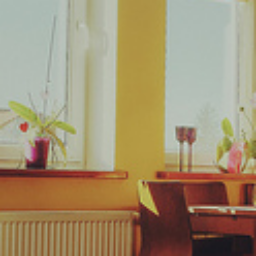

In [16]:
img

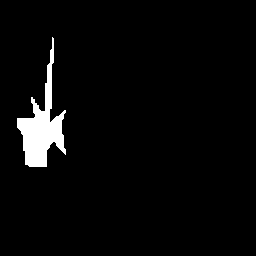

In [17]:
mask

In [12]:
img.save("/workspace/test/image1.png")
mask.save("/workspace/test/image1_mask001.png")

In [2]:
for batch in loader:
    print(batch[0].shape)
    print(batch[1]['masks'].shape)
    break

torch.Size([4, 3, 256, 256])
torch.Size([4, 256, 256])


/opt/conda/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
